# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
df = pd.read_csv("ChemicalsInCosmeticsClean.csv")
df.head()

,Unnamed: 0,CDPHId,ProductName,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,0,2,ultra color rich extra plump lipstick-all shades,4,new avon llc,avon,44,Makeup Products (non-permanent),53,"Lip Color - Lipsticks, Liners, and Pencils",...,13463-67-7,6,titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,MISSING,1
1,1,3,glover's medicated shampoo,338,j. strickland & co.,glover's,18,Hair Care Products (non-coloring),25,Hair Shampoos (making a cosmetic claim),...,65996-92-1,4,distillates (coal tar),07/01/2009,07/01/2009,MISSING,07/01/2009,07/01/2009,MISSING,2
2,2,3,glover's medicated shampoo,338,j. strickland & co.,glover's,18,Hair Care Products (non-coloring),25,Hair Shampoos (making a cosmetic claim),...,140-67-0,5,estragole,07/01/2009,07/01/2009,MISSING,07/02/2009,07/02/2009,MISSING,2
3,3,4,precision glimmer eye liner-all shades �,4,new avon llc,avon,44,Makeup Products (non-permanent),46,Eyeliner/Eyebrow Pencils,...,13463-67-7,7,titanium dioxide,07/09/2009,08/28/2013,MISSING,07/09/2009,07/09/2009,MISSING,1
4,4,5,avon brilliant shine lip gloss-all shades �,4,new avon llc,avon,44,Makeup Products (non-permanent),52,Lip Gloss/Shine,...,13463-67-7,8,titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,MISSING,1


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

/var/folders/12/rmr93cmn247fr028ldm1j3cr0000gn/T/ipykernel_95363/1344996239.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)


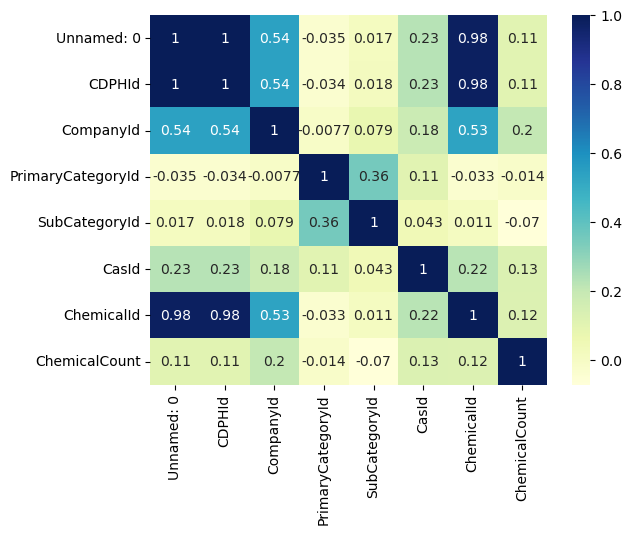

In [3]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [16]:
x = df['CDPHId']
y = df['ChemicalId']

/Users/annaprost/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


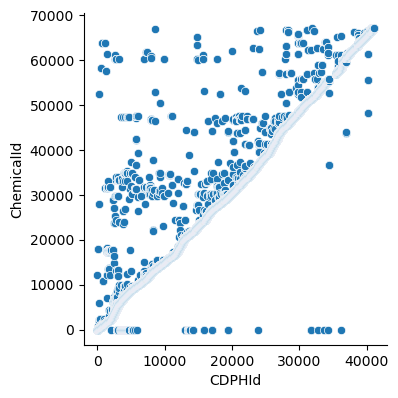

In [8]:
sns.pairplot(df, x_vars=['CDPHId'], 
             y_vars='ChemicalId', size=4, aspect=1, kind='scatter')
plt.show()

## Error Terms

Finally, plot your error terms!

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [19]:
x_train
y_train

31666    35551
5813      6145
59619    63598
41949    45650
44124    47906
         ...  
12119    13136
57191    61210
14147    15295
56088    60120
38408    42213
Name: ChemicalId, Length: 44250, dtype: int64

In [20]:
import statsmodels.api as sm


x_train_sm = sm.add_constant(x_train)

In [21]:
lr = sm.OLS(y_train, x_train_sm).fit()


lr.params

const     111.651424
CDPHId      1.605299
dtype: float64

In [22]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ChemicalId   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 1.160e+06
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:07:03   Log-Likelihood:            -4.2621e+05
No. Observations:               44250   AIC:                         8.524e+05
Df Residuals:                   44248   BIC:                         8.524e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.6514     36.740      3.039      0.002      39.641     183.662
CDPHId         1.6053      0.001   1077.157      0.000       1.602       1.608
==============================================================================
Omnibus:                    46354.189   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9402251.530
Skew:                           4.863   Prob(JB):                         0.00
Kurtosis:                      73.746   Cond. No.                     5.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

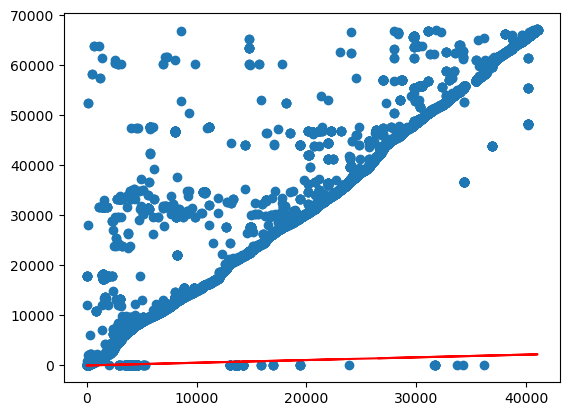

In [23]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

In [24]:
y_train_pred = lr.predict(x_train_sm)
# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

/var/folders/12/rmr93cmn247fr028ldm1j3cr0000gn/T/ipykernel_95363/3646155897.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


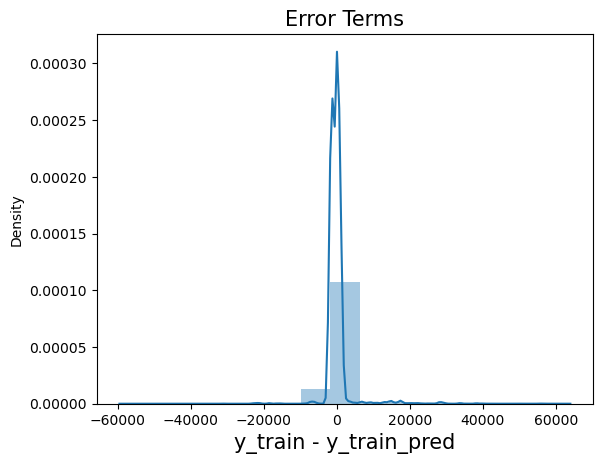

In [25]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.963
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? No, a linear regression model was not a good type of predictive analysis for my data becuase the numerical data in my dataset does not give us insight into correlations. The numerical data is all ID numbers for string values.
3. Was your plot of the error terms a bell curve? No, it was not.